In [1]:
import os
os.chdir(r"C:\Users\dell\Desktop\Github\Data mining")
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#'''******Importing the dataset *********************************************'''
df = pd.read_csv('nursery.csv')
nursery = df.copy(True)


In [3]:
#Details  of the Attributes
nursery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   parents    12960 non-null  object
 1   has_nurs   12960 non-null  object
 2   form       12960 non-null  object
 3   children   12960 non-null  object
 4   housing    12960 non-null  object
 5   finance    12960 non-null  object
 6   social     12960 non-null  object
 7   admission  12960 non-null  object
dtypes: object(8)
memory usage: 810.1+ KB


In [4]:
#calculating some statistical data like percentile, mean and std of the numerical values
nursery.describe()
df1=nursery.describe().T
df1.to_html(r'ccppdescription.html')
nursery.columns
nursery.shape

(12960, 8)

In [5]:
nursery.isnull().sum()

parents      0
has_nurs     0
form         0
children     0
housing      0
finance      0
social       0
admission    0
dtype: int64

**''''As we dont have missing values we don't need to handle missing values and
our dataset does not contains categorical data so Encoding is not required''**

In [6]:
#'''******************* Correlation Matrix & Heat Map************************'''

nursery.isna().sum()

nursery.parents.value_counts()
nursery.has_nurs.value_counts()
nursery.form .value_counts()
nursery.children.value_counts()
nursery.housing.value_counts()
nursery.finance.value_counts()
nursery.social.value_counts()
nursery.admission.value_counts()


recommended    5072
priority       4320
not_recom      3568
Name: admission, dtype: int64

In [7]:
nursery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   parents    12960 non-null  object
 1   has_nurs   12960 non-null  object
 2   form       12960 non-null  object
 3   children   12960 non-null  object
 4   housing    12960 non-null  object
 5   finance    12960 non-null  object
 6   social     12960 non-null  object
 7   admission  12960 non-null  object
dtypes: object(8)
memory usage: 810.1+ KB


In [8]:
#'''***********************#chisqaure test of all X Varibles with Y******************'''

#building observed contingency table  
obs_contingency_table = pd.crosstab(nursery.parents,nursery.admission)

from scipy.stats.contingency import chi2_contingency
chi, p_val, dof, exp_con_table = chi2_contingency(obs_contingency_table)

#-------------------

obs_contingency_table1 = pd.crosstab(nursery.has_nurs,nursery.admission)
chi_1, p_val1, dof, exp_con_table2 = chi2_contingency(obs_contingency_table1)

#-------------------
    
obs_contingency_table2 = pd.crosstab(nursery.form,nursery.admission)
chi2, p_val2, dof, exp_con_table2 = chi2_contingency(obs_contingency_table2)

#-------------------
    
obs_contingency_table3 = pd.crosstab(nursery.children,nursery.admission)
chi3, p_val3, dof, exp_con_table3 = chi2_contingency(obs_contingency_table3)

#-------------------
obs_contingency_table4 = pd.crosstab(nursery.housing,nursery.admission)
chi4, p_val4, dof, exp_con_table4 = chi2_contingency(obs_contingency_table4)

#--------------------
obs_contingency_table5 = pd.crosstab(nursery.finance,nursery.admission)
chi_5, p_val5, dof, exp_con_table5 = chi2_contingency(obs_contingency_table5)

#------------------------------
obs_contingency_table6 = pd.crosstab(nursery.social,nursery.admission)
chi6, p_val6, dof, exp_con_table6 = chi2_contingency(obs_contingency_table6)

print("Conclusion: Accepted:",p_val )
print("Conclusion: Accepted:",p_val1)
print("Conclusion: Rejected:",p_val2)
print("Conclusion: Rejected:",p_val3)
print("Conclusion: Rejected:",p_val4)
print("Conclusion: Rejected:",p_val5)
print("Conclusion: Accepted:",p_val6)


Conclusion: Accepted: 0.0
Conclusion: Accepted: 1.2641178856513187e-167
Conclusion: Rejected: 0.32787239093713016
Conclusion: Rejected: 0.9987462831215925
Conclusion: Rejected: 0.9980673342013832
Conclusion: Rejected: 0.9990455958504794
Conclusion: Accepted: 0.00315749242477732


In [9]:
#'''**************Encode parents,has_nur, form, housing, finance, social Variables*****'''

nursery.info()
nursery = pd.get_dummies(nursery,columns = ['parents','has_nurs','form','housing','finance','social'], drop_first = True)
nursery.info()


nursery.children = nursery.children.map({
                        '1':1,
                        '2':2,
                        '3':3,
                        'more':4
        })

nursery.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   parents    12960 non-null  object
 1   has_nurs   12960 non-null  object
 2   form       12960 non-null  object
 3   children   12960 non-null  object
 4   housing    12960 non-null  object
 5   finance    12960 non-null  object
 6   social     12960 non-null  object
 7   admission  12960 non-null  object
dtypes: object(8)
memory usage: 810.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   children              12960 non-null  object
 1   admission             12960 non-null  object
 2   parents_pretentious   12960 non-null  uint8 
 3   parents_usual         12960 non-null  uint8 
 4   has_nurs_improper     12960 non-null  uint8 
 

children                0
admission               0
parents_pretentious     0
parents_usual           0
has_nurs_improper       0
has_nurs_less_proper    0
has_nurs_proper         0
has_nurs_very_crit      0
form_completed          0
form_foster             0
form_incomplete         0
housing_critical        0
housing_less_conv       0
finance_inconv          0
social_problematic      0
social_slightly_prob    0
dtype: int64

<AxesSubplot:>

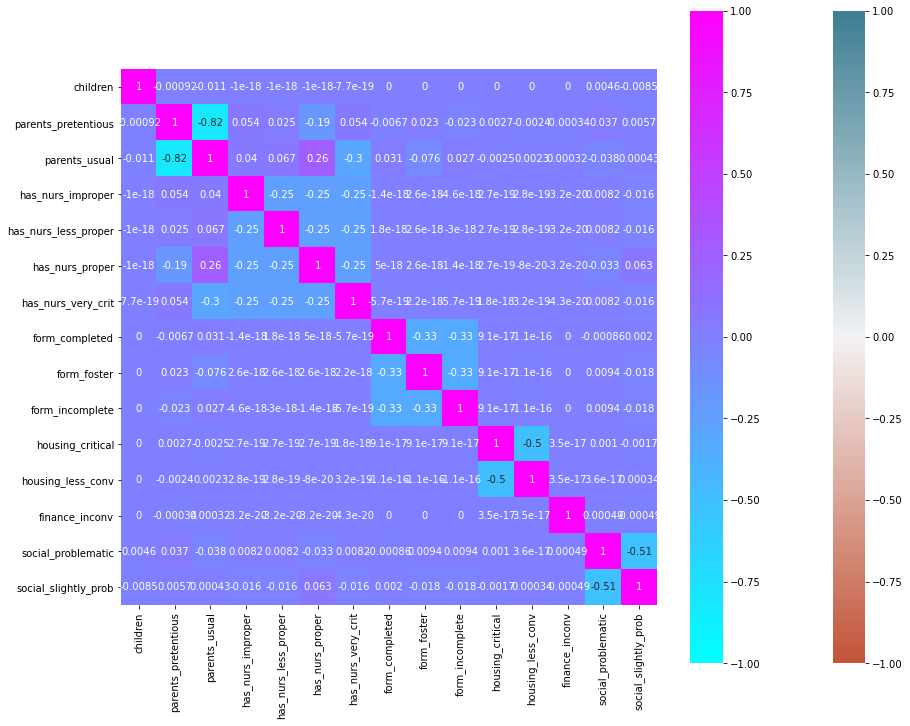

In [10]:
import seaborn as sns
f,ax = plt.subplots(figsize=(15, 12))
corr_nur = nursery.corr()

subplt = sns.heatmap(
        corr_nur,
        vmin=-1 , vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
        )
sns.heatmap(corr_nur, vmin = -1, vmax = 1, annot = True, cmap= 'cool')


In [11]:
#'''***************** Initiating independent=X and Dependent=y Variables*****'''
X = nursery.drop(['form_completed','form_foster','form_incomplete','children','housing_critical','housing_less_conv','finance_inconv','admission'], axis = 1)
y = nursery.admission

In [12]:
#'''******* Splitting the dataset into the Training set and Test set**********'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
#'''********************* Scalling using Standard-Scaler*************************'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [14]:
#'''********************# Training the model on the Training set************'''
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#'''*******************#Prediction on Test Set **********************************'''
y_pred = reg.predict(X_test_scaled)
y_pred

array(['not_recom', 'recommended', 'not_recom', ..., 'recommended',
       'recommended', 'priority'], dtype=object)

In [16]:
#Confusion_matrix & Accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[477,  40, 211],
       [235,  21, 589],
       [ 21,   0, 998]], dtype=int64)

In [17]:
accuracy_score(y_test, y_pred)

0.5771604938271605

In [18]:
y.value_counts()

recommended    5072
priority       4320
not_recom      3568
Name: admission, dtype: int64

In [19]:
#'''*******************Precision_score, Recall_score ***************************'''
from sklearn.metrics import precision_score, recall_score
precision_score(y_test,y_pred,average='macro')

0.5166912717446542

In [20]:
recall_score(y_test,y_pred,average='macro')

0.5531544705263283

In [21]:
#'''**********************classification_report*********************************'''
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))


              precision    recall  f1-score   support

   not_recom       0.65      0.66      0.65       728
    priority       0.34      0.02      0.05       845
 recommended       0.56      0.98      0.71      1019

    accuracy                           0.58      2592
   macro avg       0.52      0.55      0.47      2592
weighted avg       0.51      0.58      0.48      2592



In [22]:
#'''*****************************K-fold*************************************'''

from sklearn.model_selection import cross_val_score
cross_val_score(reg,X,y,cv=4) 

array([0.35185185, 0.3691358 , 0.49351852, 0.39135802])

In [23]:
# Checking the mean  value of the scores of k-fold as same as above code
cross_val_score(reg,X,y,cv=4).mean()

0.401466049382716

# <center>Thank You.......